# Conditions Sampled During DUNEX from 8 m Array

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import datetime
import netCDF4 as nc
import matplotlib.patches as patches
import cftime

%load_ext autoreload
%autoreload 2
%matplotlib widget

In [2]:
# Get list of times in and out of water from Notes Spreadsheet
# Define Project Directory 
project_dir = '../'

# Define Data Directory
data_dir = 'microSWIFT_data/'

# Define Metadata Excel sheet name
metadata_name = 'DUNEXMainExp_notes.xlsx'

# Combine file name and project Directory
metadata_filename = project_dir + metadata_name

# Create dataframe object from DUNEX MetaData SpreadSheet
dunex_xlsx = pd.read_excel(metadata_filename)

# Get start and end times
start_times = []
end_times = []
for n in np.arange(len(dunex_xlsx['Start Time'])):
    start_times.append(datetime.datetime.fromisoformat(dunex_xlsx['Start Time'][n]))
    end_times.append(datetime.datetime.fromisoformat(dunex_xlsx['End Time'][n]))

In [8]:
# Load in 8 m array data
array_8m_url = 'https://chlthredds.erdc.dren.mil/thredds/dodsC/frf/' \
                'oceanography/waves/8m-array/2021/FRF-ocean_waves_8m-array_202110.nc'
array_8m_data = nc.Dataset(array_8m_url)

# Get wave parameters from dataset
time = cftime.num2pydate(array_8m_data['time'][:],
                         array_8m_data['time'].units,
                         array_8m_data['time'].calendar)
Hs = array_8m_data['waveHs'][:]
Tm = array_8m_data['waveTm'][:]
Dm = array_8m_data['waveMeanDirection'][:]

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

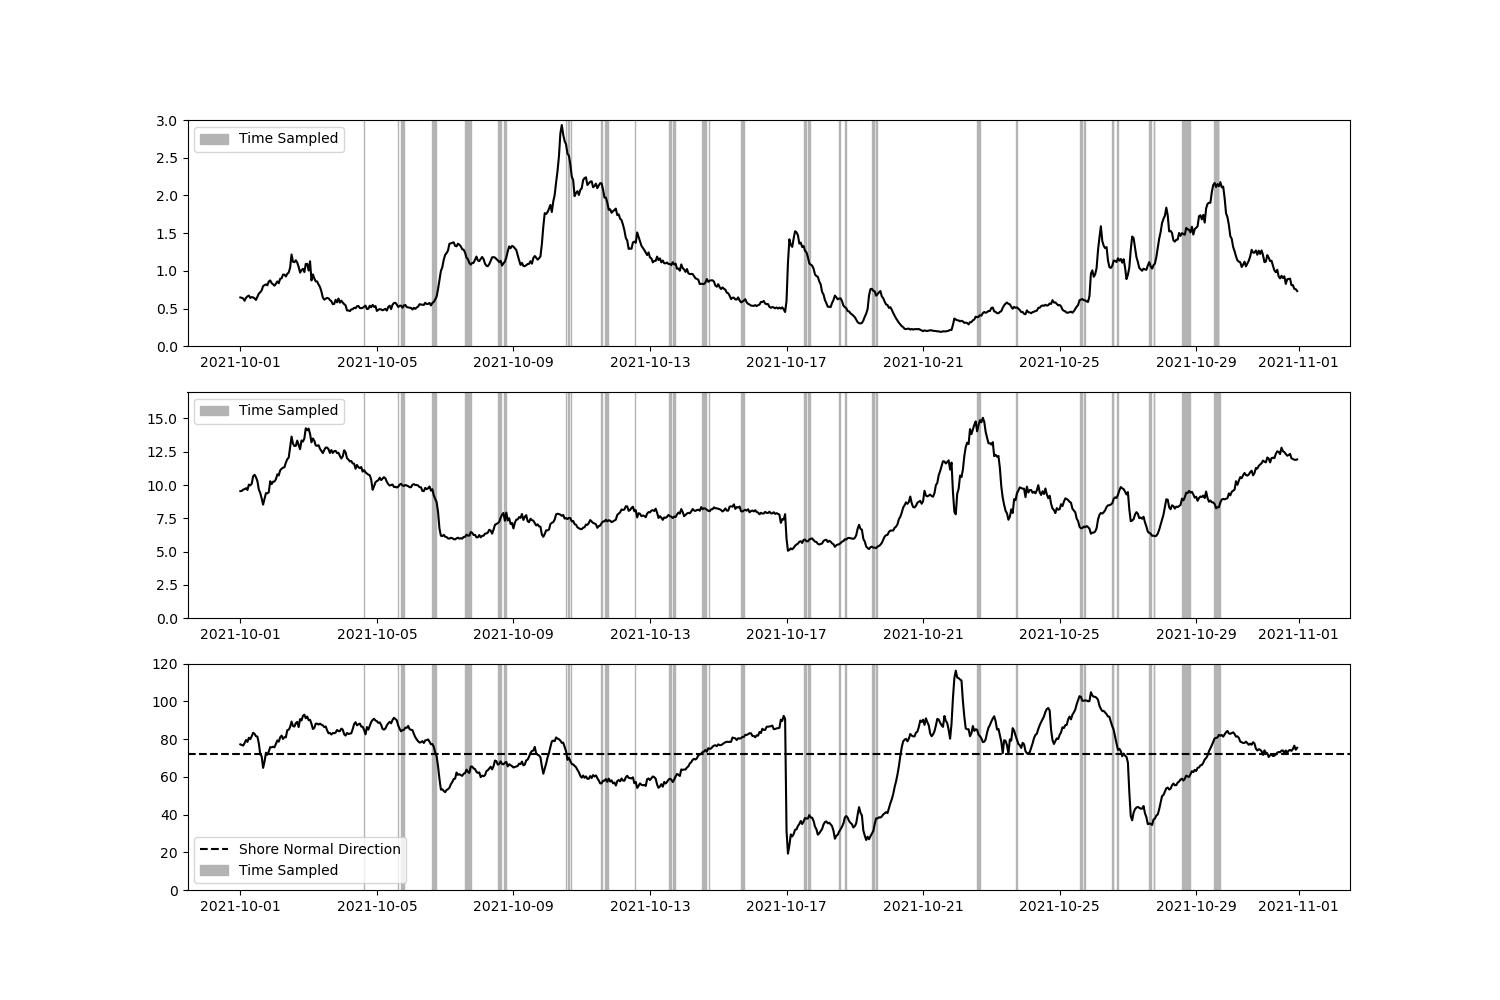

In [23]:
# Plot time series of each Parameter
fig_params, (ax_hs, ax_tm, ax_dm) = plt.subplots(3, figsize=(15,10))

# Plot Hs
ax_hs.plot(time, Hs, color='k')
# ax_hs.set_ylabel('Significant Wave Height, Hs [m]')
# ax_hs.set_xlabel('Time')
ax_hs.set_ylim(0, 3)

# Plot Tp
ax_tm.plot(time, Tm, color='k')
# ax_tm.set_ylabel('Mean Period, Tm [sec]')
# ax_tm.set_xlabel('Time')
ax_tm.set_ylim(0, 17) 

# Plot Dp
ax_dm.plot(time, Dm, color='k')
# ax_dm.set_ylabel('Mean Direction, Dm [degrees]')
# # ax_dm.set_xlabel('Time')
ax_dm.set_ylim(0, 120)
ax_dm.axhline(71.8, label='Shore Normal Direction',
              color='k', linestyle='dashed')

# Add Mission Time block patches
for ind in np.arange(1,len(start_times)-1):
    if ind == 6:
        # skip mission 6 which was not a real mission but a separate offload for the micros that were lost then recovered later - see notes spreadsheet
        continue
    ax_hs.add_patch(patches.Rectangle((start_times[ind], 0),
                                       end_times[ind]-start_times[ind], 3, 
                                       linewidth=1, edgecolor='0.7',
                                       facecolor='0.7'))
    ax_tm.add_patch(patches.Rectangle((start_times[ind], 0),
                                       end_times[ind]-start_times[ind], 17,
                                       linewidth=1, edgecolor='0.7',
                                       facecolor='0.7'))
    ax_dm.add_patch(patches.Rectangle((start_times[ind], 0),
                                       end_times[ind]-start_times[ind], 120,
                                       linewidth=1, edgecolor='0.7',
                                       facecolor='0.7'))

ax_hs.add_patch(patches.Rectangle((start_times[ind], 0),
                                    end_times[ind]-start_times[ind], 3, 
                                    linewidth=1, edgecolor='0.7',
                                    facecolor='0.7', label='Time Sampled'))

ax_tm.add_patch(patches.Rectangle((start_times[-1], 0),
                                    end_times[-1]-start_times[ind], 17,
                                    linewidth=1, edgecolor='0.7',
                                    facecolor='0.7', label='Time Sampled'))

ax_dm.add_patch(patches.Rectangle((start_times[-1], 0),
                                    end_times[-1]-start_times[ind], 120,
                                    linewidth=1, edgecolor='0.7',
                                    facecolor='0.7', label='Time Sampled'))

ax_hs.legend()
ax_tm.legend()
ax_dm.legend()
# Set Figure Properties
plt.tight_layout